<p>Problem Statement
A retail store wants to get insights about its customers. And then build a system that can cluster customers into different groups. </p>

In [23]:
import pandas as pd
from sklearn.cluster import  KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import matplotlib.pyplot as plt
# visualization
import seaborn as sns 


<p> Problem Statement
A retail store wants to get insights about its customers. And then build a system that can cluster customers into different groups.

About the dataset
The dataset can be downloaded from the kaggle website which can be found here.

</p>
<p>
 Customer ID
2. Customer Gender
3. Customer Age
4. Annual Income of the customer (in Thousand Dollars)
5. Spending score of the customer (based on customer behaviour and spending nature)</p>

In [24]:
df=pd.read_csv('./data/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df['Gender'].replace({'Male':1, 'Female':0} ,inplace=True)

In [20]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [26]:
# looking for null values
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

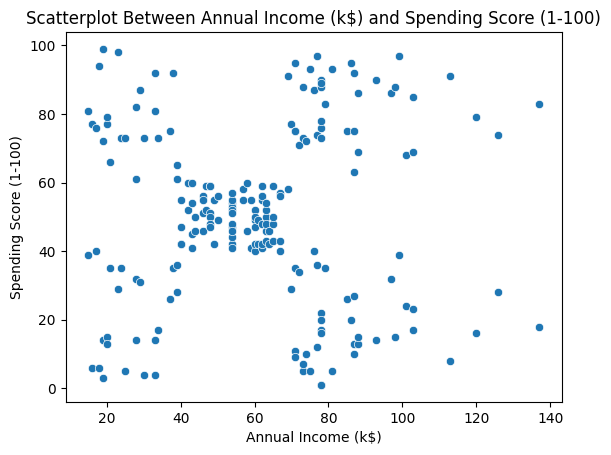

In [38]:
# plot to see relationship
#sns.scatterplot(df) # all but if we need some column only 
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data=df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)')


In [39]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [44]:
# feature selection
X = df.iloc[:,1:]
X


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [46]:
df.describe()
# problem in scalling 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<p>Feature normalization helps to adjust all the data elements to a common scale in order to improve the performance of the clustering algorithm</p>

In [65]:
# scaler = MinMaxScaler().fit(X) #It makes an object of the MinMaxScaler and then we fit it on our variable X. 
# scaler.feature_range
# (0, 1)
# scaler.transform(X) 
# # use standard scallaer
scaled_dataset = StandardScaler().fit_transform(X)


<p># n_init: Number of time the k-means algorithm will be run with different centroid seeds. </br> The final results will be the best output of n_init consecutive runs in terms of inertia.</p>

In [89]:
# randomly assign n_clusters 

kmeans= KMeans(n_clusters = 3, n_init = 12) #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [90]:
# lets now the cluster centroids the five ranges () 
print(kmeans.cluster_centers_)

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]
 [ 0.52631579 40.39473684 87.         18.63157895]]


In [91]:
# check centroid values
labels = kmeans.labels_
df["Labels"] = labels


In [92]:
df.groupby('Labels').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Group | cluster
Labels,,,,,,,
0,162.0,0.461538,32.692308,86.538462,82.128205,0.000000,0.000000
1,62.0,0.406504,40.325203,44.154472,49.829268,1.910569,1.910569
2,162.0,0.526316,40.394737,87.000000,18.631579,1.947368,1.947368


In [104]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

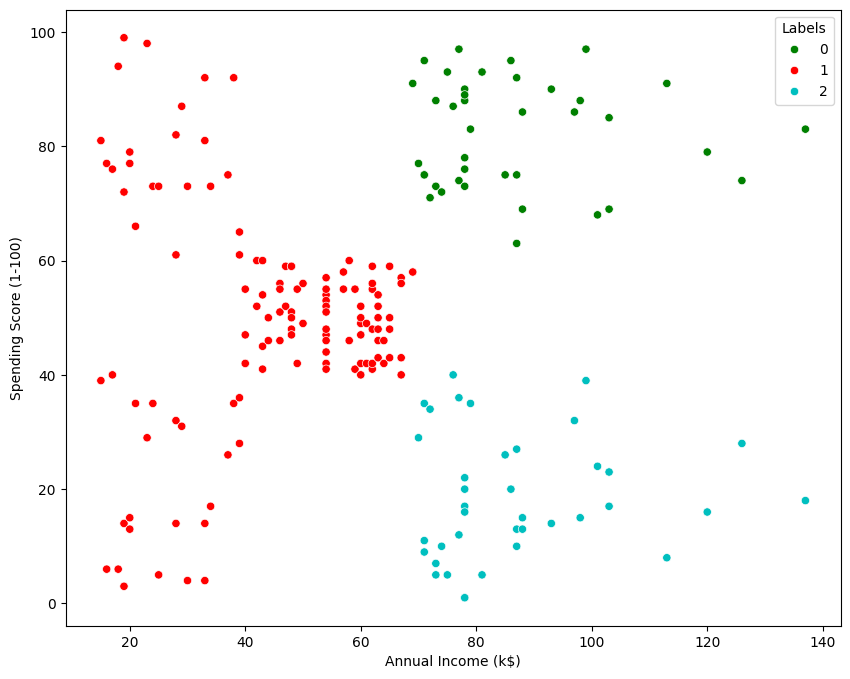

In [144]:
# visualize the data
plt.figure(figsize= (10, 8))

# default x and Y see relation b/n income and spending score with hue labels 

sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Labels'], palette=['g', 'r', 'c'] )

# data 

#sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],data=data,hue=df['Labels'], palette=['g', 'r', 'c'] )


<p>
 Cluster 1 (green): These are <b>average income earners with average spending scores. </b><b style='color: green'>They are cautious with their spending at the store </b>.

Cluster 2 (yellow): The customers in this group are <b style='color: Yellow'> high income earners and with high spending scores </b>.  <h2> They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.</h2>

Cluster 3 (red): This group of customers <b style='color: red'> have a higher income but they do not spend more at the store </b>. One of the assumption could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team because they have the potential to bring in increased profit for the store.
</p>

In [123]:
# drow centroids
#plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods')
#Plotting the centriods

In [139]:
import numpy as np
Gender=0	
Age=25	
Income=20	
SpendingScore=6
newdata=np.array([[Gender,Age,Income,SpendingScore]]) ## [[]] reshaping is needed 

scalar=StandardScaler()
scaleddata=scalar.fit_transform(newdata)
pred=kmeans.predict(scaleddata)
if pred[0] == 0:
    print('Low level Customer')
elif pred[0]==1:
    print('Top level Customer')
else:
    print('Less spenting Customer')
    

Top level Customer


/home/fedlu/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
